In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
df = pd.read_csv('DataSets/car_price_pred_archive/train.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
print(df.Manufacturer.unique())
print(df.Model.unique())

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']


In [6]:
print(df.Category.unique())

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


In [7]:
print(df['Fuel type'].unique())

['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']


<AxesSubplot:xlabel='Fuel type', ylabel='count'>

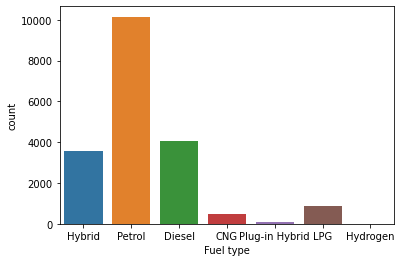

In [8]:
sns.countplot(x=df['Fuel type'],data=df)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

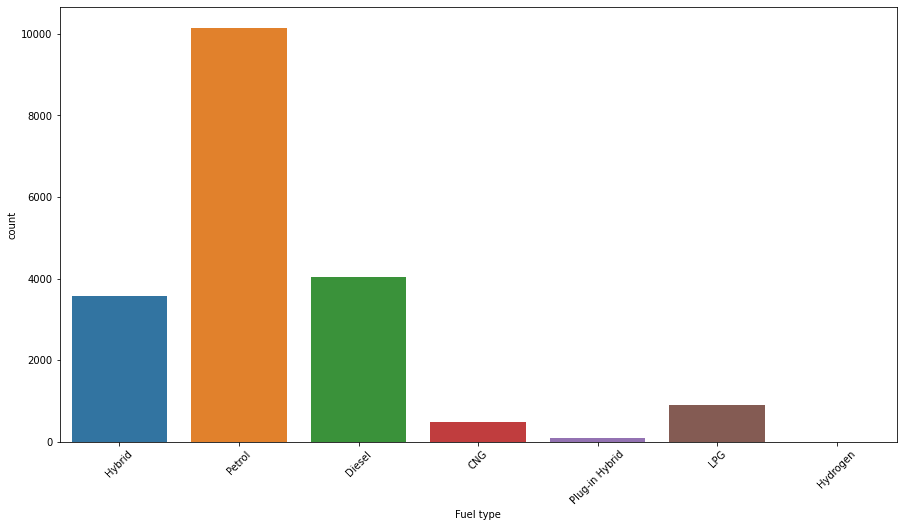

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
sns.countplot(x='Fuel type',data=df,)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)


In [10]:
df.Price.skew()

136.47042654268714

In [11]:
df_cleaned = df

In [12]:
print('10th percentile = ' +str(df['Price'].quantile(0.10)))
print('25th percentile = ' +str(df['Price'].quantile(0.25)))
print('50th percentile = ' +str(df['Price'].quantile(0.50)))
print('75th percentile = ' +str(df['Price'].quantile(0.75)))
print('90th percentile = ' +str(df['Price'].quantile(0.90)))
print('Max price = ' +str(df['Price'].max()))


10th percentile = 627.0
25th percentile = 5331.0
50th percentile = 13172.0
75th percentile = 22075.0
90th percentile = 38609.0
Max price = 26307500


In [13]:
df_cleaned["Price"] = np.where(df_cleaned["Price"] >38609, 38609,df_cleaned['Price'])
print(df_cleaned['Price'].skew())

0.62383509508535


In [14]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,15213.204554,2010.912824,4.582991,6.582627
std,9.365914e+05,12020.650105,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000,1939.000000,1.000000,0.000000
25%,4.569837e+07,5331.000000,2009.000000,4.000000,4.000000
50%,4.577231e+07,13172.000000,2012.000000,4.000000,6.000000
75%,4.580204e+07,22075.000000,2015.000000,4.000000,12.000000
max,4.581665e+07,38609.000000,2020.000000,16.000000,16.000000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

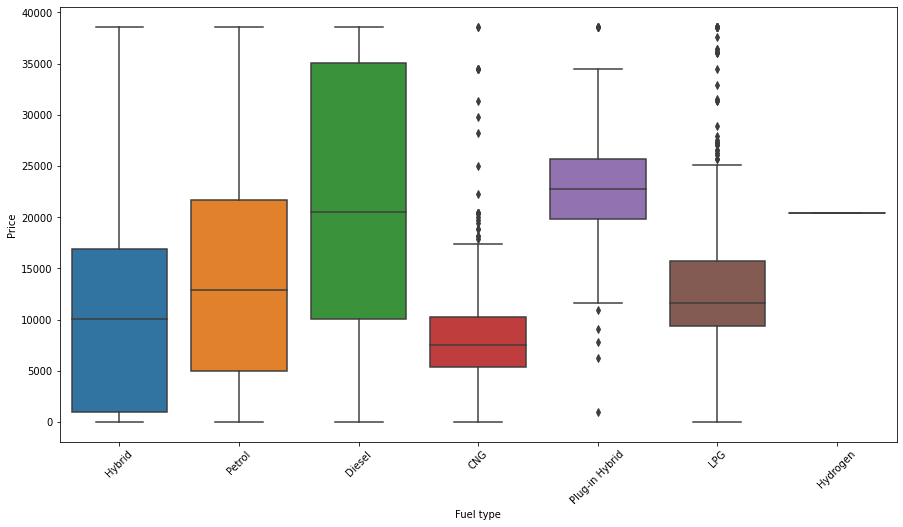

In [15]:
plt.figure(figsize = (15,8))
sns.boxplot(x='Fuel type',y='Price',data=df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

In [16]:
cm = df_cleaned.corr()
print(cm)

                  ID     Price  Prod. year  Cylinders   Airbags
ID          1.000000 -0.003588    0.071352  -0.039319 -0.020527
Price      -0.003588  1.000000    0.309453   0.028891 -0.058282
Prod. year  0.071352  0.309453    1.000000  -0.096797  0.236969
Cylinders  -0.039319  0.028891   -0.096797   1.000000  0.176868
Airbags    -0.020527 -0.058282    0.236969   0.176868  1.000000


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

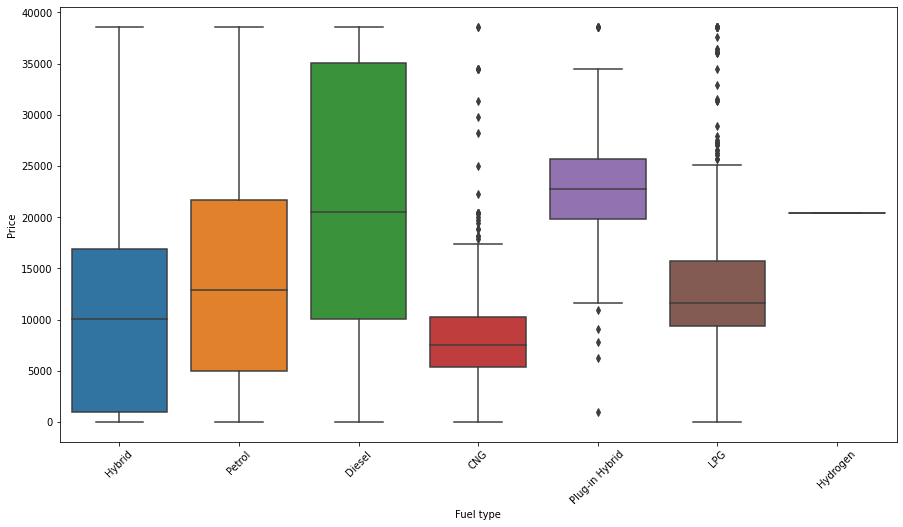

In [17]:
plt.figure(figsize = (15,8))
sns.boxplot(x='Fuel type',y='Price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

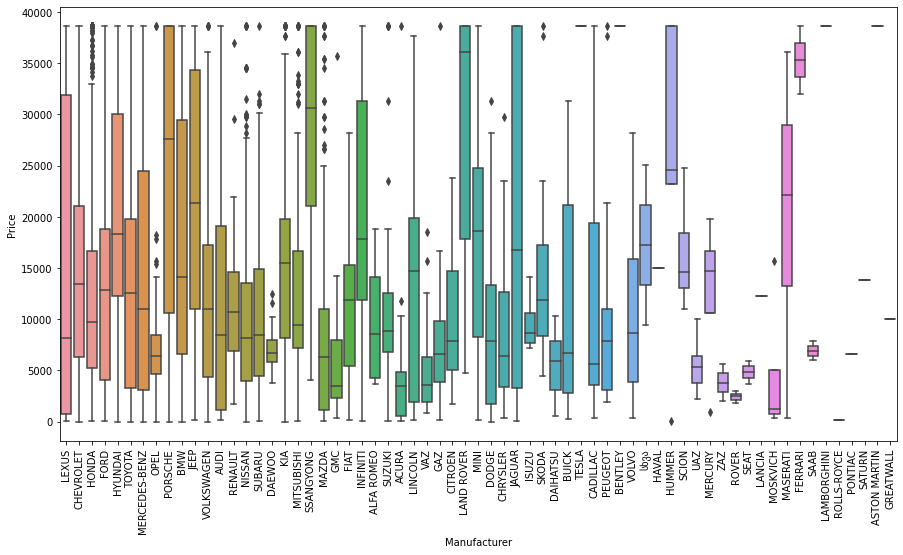

In [18]:
plt.figure(figsize = (15,8))
sns.boxplot(x='Manufacturer',y='Price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

<AxesSubplot:xlabel='Leather interior', ylabel='Price'>

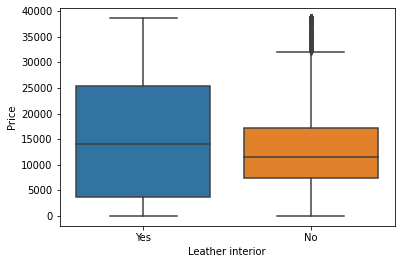

In [19]:
sns.boxplot(x='Leather interior',y='Price',data=df_cleaned)

[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

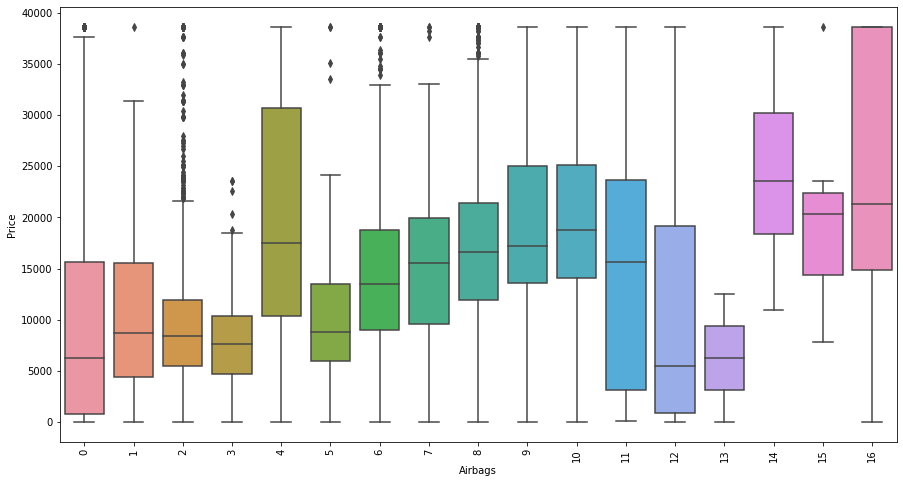

In [20]:
print(df_cleaned.Airbags.unique())
plt.figure(figsize = (15,8))
sns.boxplot(x='Airbags',y='Price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

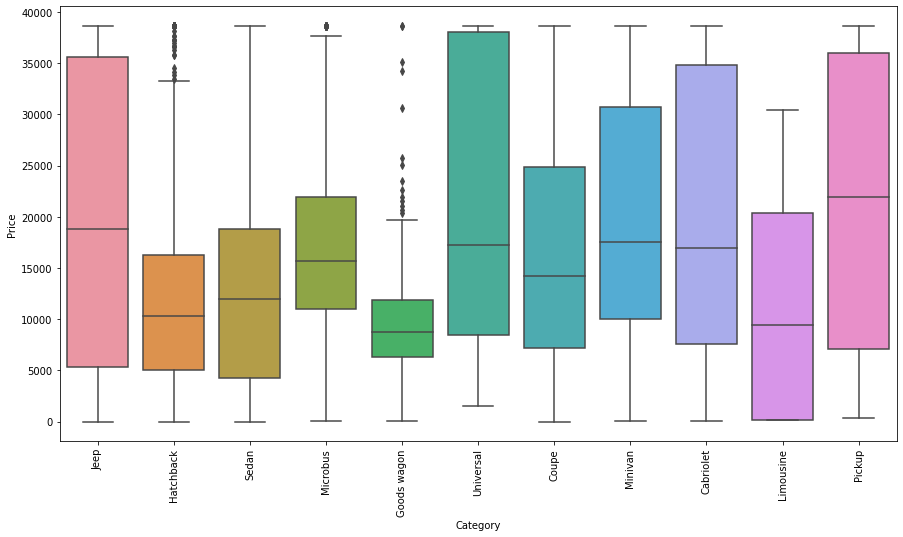

In [21]:
print(df_cleaned.Category.unique())
plt.figure(figsize = (15,8))
sns.boxplot(x='Category',y='Price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [22]:
print(df_cleaned['Prod. year'].unique())

[2010 2011 2006 2014 2016 2013 2007 1999 1997 2018 2008 2012 2017 2001
 1995 2009 2000 2019 2015 2004 1998 1990 2005 2003 1985 1996 2002 1993
 1992 1988 1977 1989 1994 2020 1984 1986 1991 1983 1953 1964 1974 1987
 1943 1978 1965 1976 1957 1980 1939 1968 1947 1982 1981 1973]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

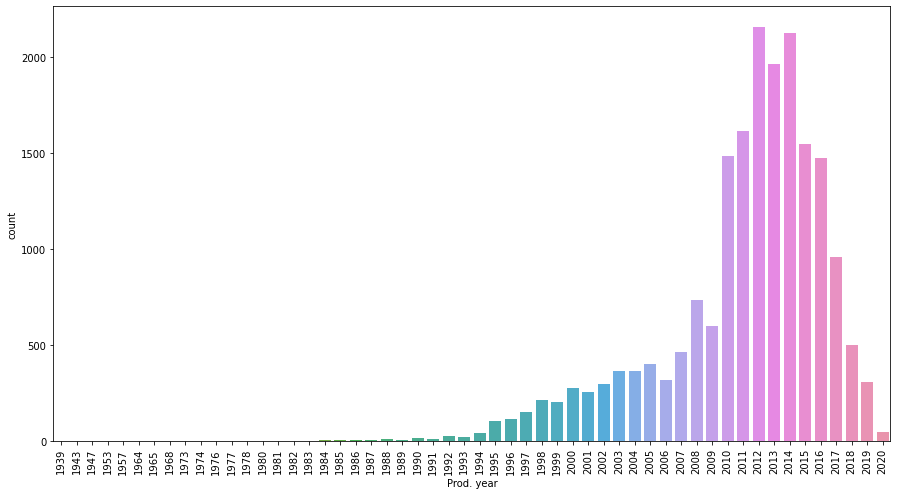

In [23]:
plt.figure(figsize = (15,8))
sns.countplot(x='Prod. year',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

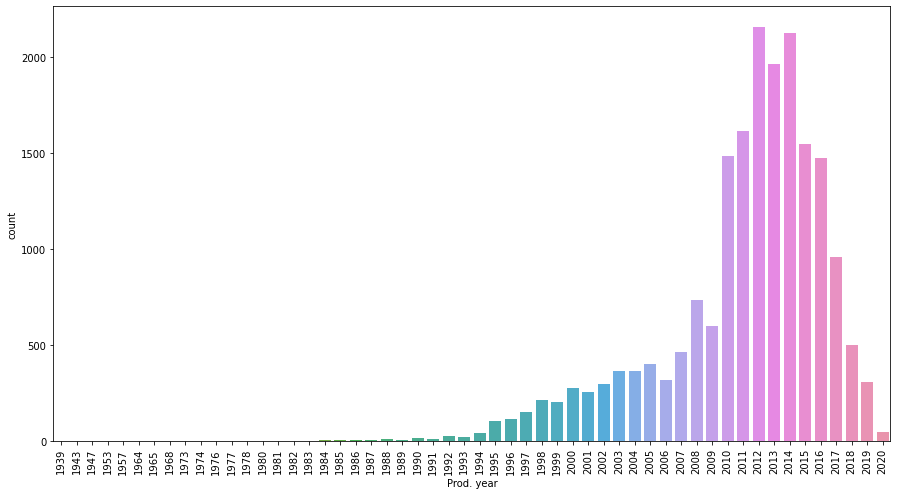

In [24]:
plt.figure(figsize = (15,8))
sns.countplot(x='Prod. year',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 1080x576 with 0 Axes>

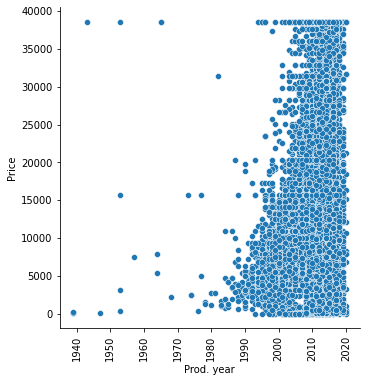

In [25]:
plt.figure(figsize = (15,8))
sns.relplot(x='Prod. year',y='Price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [26]:
df_cleaned.drop(df_cleaned[df_cleaned['Prod. year'] < 1992].index, inplace = True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 1080x576 with 0 Axes>

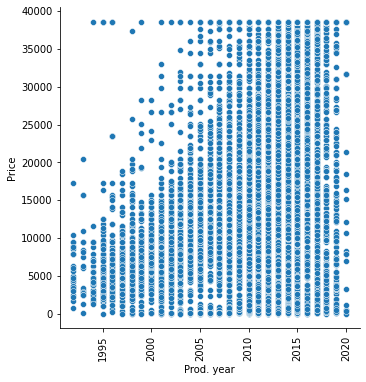

In [27]:
plt.figure(figsize = (15,8))
sns.relplot(x='Prod. year',y='Price',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19140 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19140 non-null  int64  
 1   Price             19140 non-null  int64  
 2   Levy              19140 non-null  object 
 3   Manufacturer      19140 non-null  object 
 4   Model             19140 non-null  object 
 5   Prod. year        19140 non-null  int64  
 6   Category          19140 non-null  object 
 7   Leather interior  19140 non-null  object 
 8   Fuel type         19140 non-null  object 
 9   Engine volume     19140 non-null  object 
 10  Mileage           19140 non-null  object 
 11  Cylinders         19140 non-null  float64
 12  Gear box type     19140 non-null  object 
 13  Drive wheels      19140 non-null  object 
 14  Doors             19140 non-null  object 
 15  Wheel             19140 non-null  object 
 16  Color             19140 non-null  object

In [29]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '3.2', '3.8', '4.6', '1.2', '5', '1.7',
       '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '1.9', '2.7',
       '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1', '2.1', '0.7',
       '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6', '1.9 Turbo',
       '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7', '4.8 Turbo',
       '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4', '1.7 Turbo',
       '6.3 Turbo', '2.8 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '6.3', '3.9', '5

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

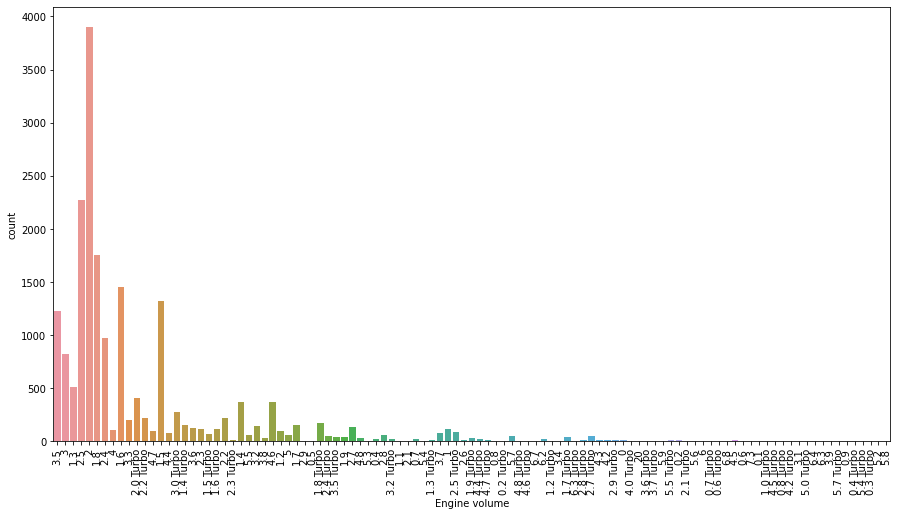

In [30]:
plt.figure(figsize = (15,8))
sns.countplot(x='Engine volume',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [31]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

[None, None, None, None, None, None, None, None]

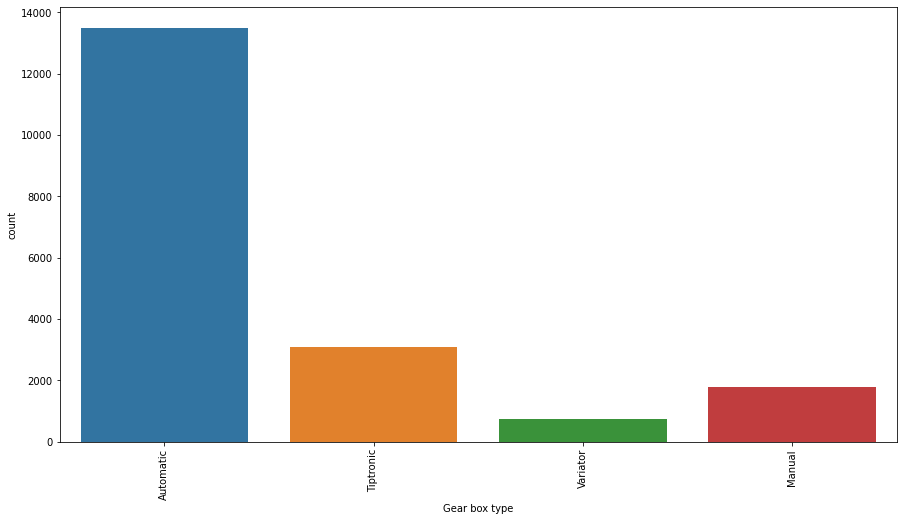

In [32]:
plt.figure(figsize = (15,8))
sns.countplot(x='Gear box type',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

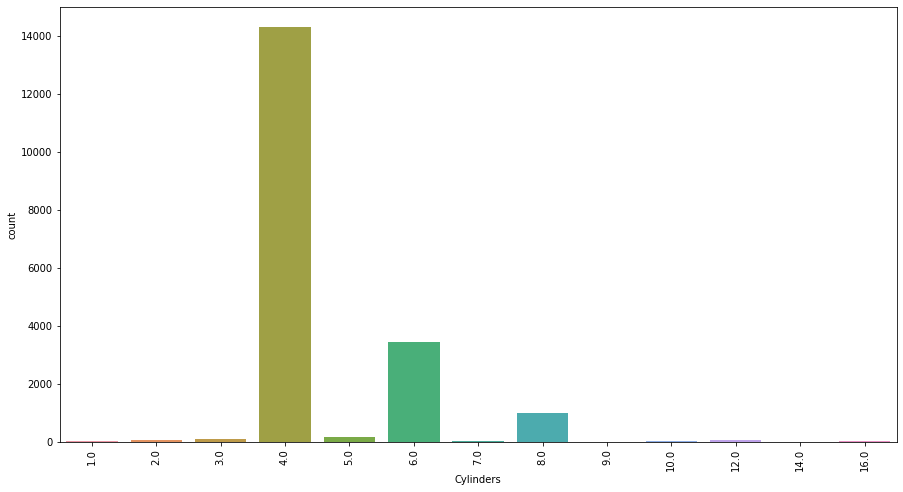

In [33]:
df_cleaned.Cylinders.unique()
plt.figure(figsize = (15,8))
sns.countplot(x='Cylinders',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [34]:
df.Cylinders.skew()
print('10th percentile = ' +str(df['Cylinders'].quantile(0.10)))
print('25th percentile = ' +str(df['Cylinders'].quantile(0.25)))
print('50th percentile = ' +str(df['Cylinders'].quantile(0.50)))
print('75th percentile = ' +str(df['Cylinders'].quantile(0.75)))
print('90th percentile = ' +str(df['Cylinders'].quantile(0.90)))

10th percentile = 4.0
25th percentile = 4.0
50th percentile = 4.0
75th percentile = 4.0
90th percentile = 6.0


In [35]:
df_cleaned["Cylinders"] = np.where(df_cleaned["Cylinders"] < 4.0, 4.0,df_cleaned['Cylinders'])

In [36]:
df_cleaned["Cylinders"].skew()

2.258235596237036

In [37]:
df_cleaned["Cylinders"] = np.where(df_cleaned["Cylinders"] > 6.0, 6.0,df_cleaned['Cylinders'])
print(df_cleaned["Cylinders"].skew())

1.221988018459788


In [38]:
print('95th percentile = ' +str(df['Cylinders'].quantile(0.95)))

95th percentile = 6.0


[None, None, None, None, None, None]

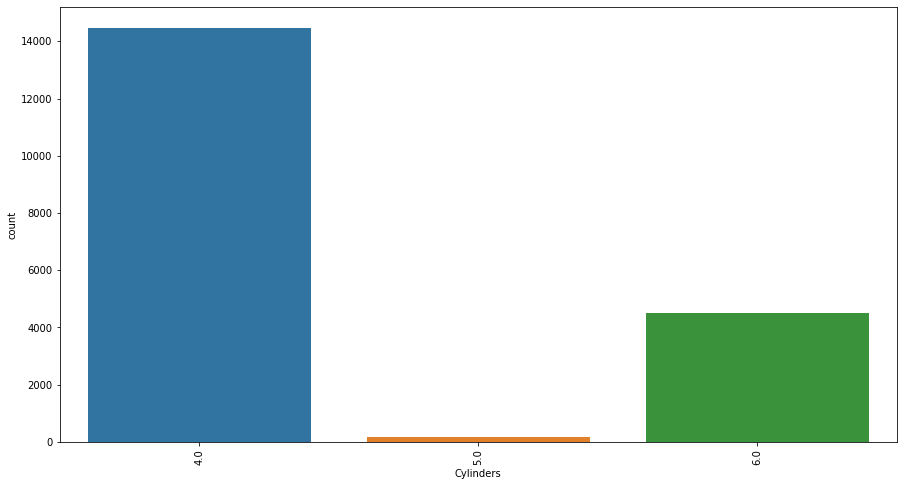

In [39]:
df_cleaned.Cylinders.unique()
plt.figure(figsize = (15,8))
sns.countplot(x='Cylinders',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [40]:
df_cleaned['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

[None, None, None, None, None, None]

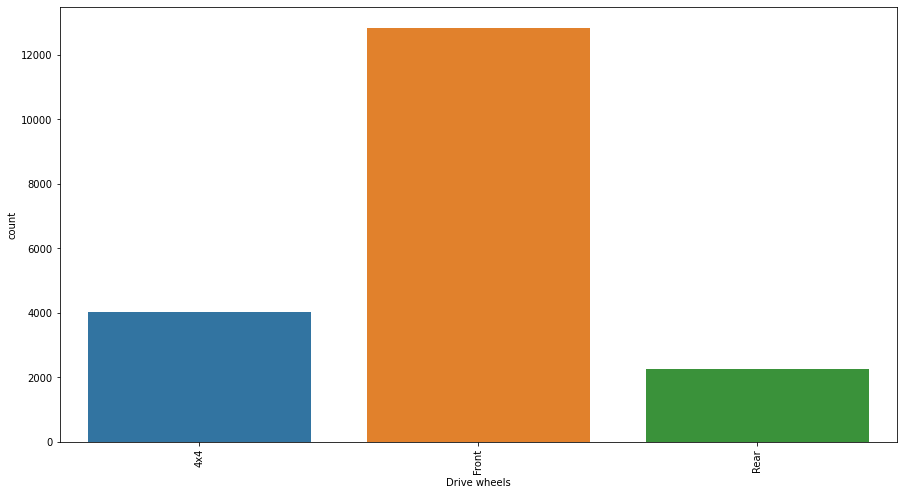

In [41]:
plt.figure(figsize = (15,8))
sns.countplot(x='Drive wheels',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

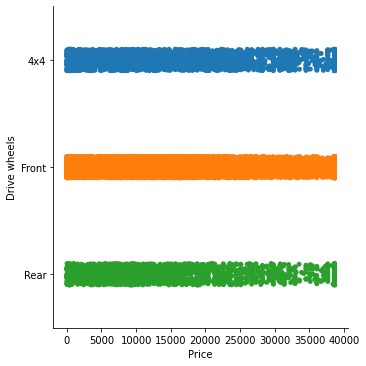

In [42]:
sns.catplot(x='Price',y='Drive wheels',data=df_cleaned)

<AxesSubplot:xlabel='Price', ylabel='Drive wheels'>

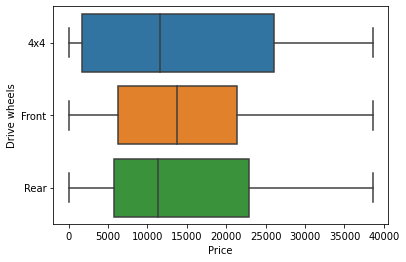

In [43]:
sns.boxplot(x='Price',y='Drive wheels',data=df_cleaned)

<AxesSubplot:xlabel='Wheel', ylabel='count'>

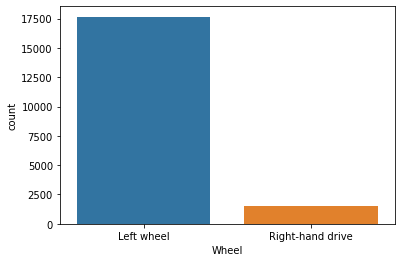

In [44]:
sns.countplot(x='Wheel',data=df_cleaned)

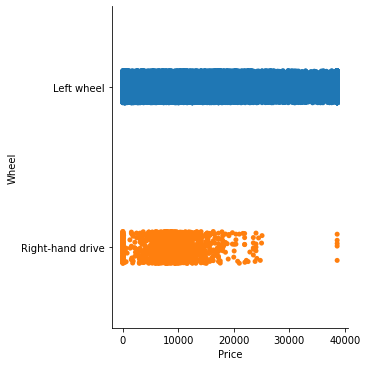

In [45]:
sns.catplot(x='Price',y='Wheel',data=df_cleaned)

In [46]:
df.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [47]:
df_cleaned["Doors"] = np.where(df_cleaned["Doors"] == '04-May', 4, df_cleaned['Doors'])
df_cleaned["Doors"] = np.where(df_cleaned["Doors"] == '02-Mar', 2, df_cleaned['Doors'])

In [48]:
df.Doors.unique()

array([4, 2, '>5'], dtype=object)

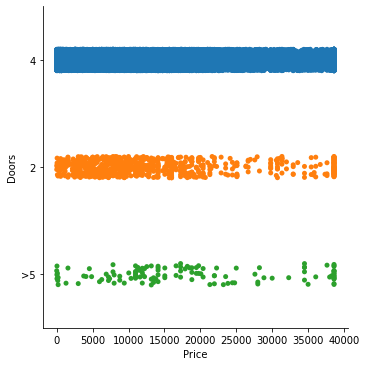

In [49]:
sns.catplot(x='Price',y='Doors',data=df_cleaned)

<AxesSubplot:xlabel='Doors', ylabel='count'>

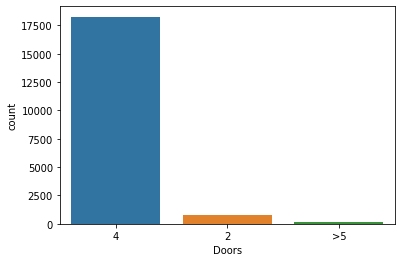

In [50]:
sns.countplot(x='Doors',data=df_cleaned)

In [51]:
df_cleaned.Color.unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

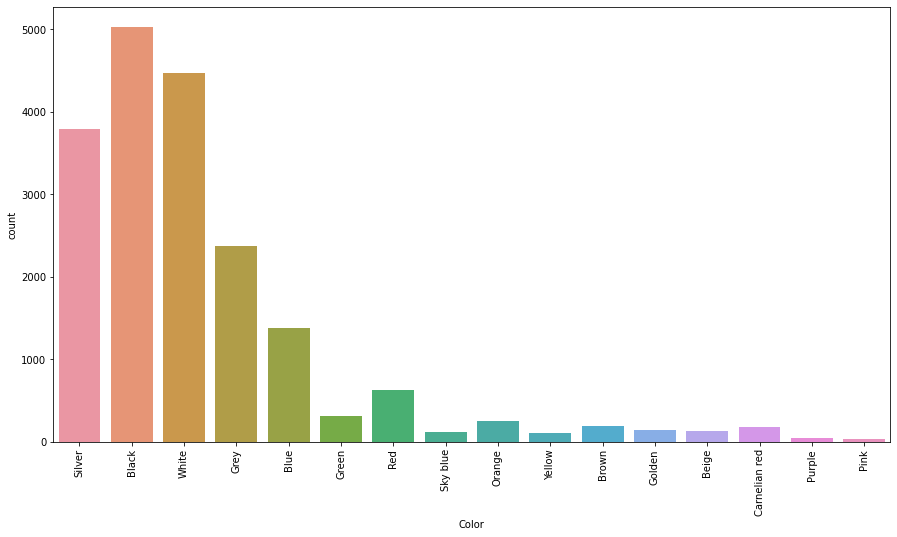

In [52]:
plt.figure(figsize = (15,8))
sns.countplot(x='Color',data=df_cleaned)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [53]:
df_cleaned.drop(df_cleaned[df_cleaned['Fuel type'] == 'Hydrogen'].index, inplace = True)

In [54]:
df_cleaned['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG'],
      dtype=object)

In [55]:
df_cleaned.drop(df_cleaned[df_cleaned['Fuel type'] == 'Plug-in Hybrid'].index, inplace = True)

In [56]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19053 non-null  int64  
 1   Price             19053 non-null  int64  
 2   Levy              19053 non-null  object 
 3   Manufacturer      19053 non-null  object 
 4   Model             19053 non-null  object 
 5   Prod. year        19053 non-null  int64  
 6   Category          19053 non-null  object 
 7   Leather interior  19053 non-null  object 
 8   Fuel type         19053 non-null  object 
 9   Engine volume     19053 non-null  object 
 10  Mileage           19053 non-null  object 
 11  Cylinders         19053 non-null  float64
 12  Gear box type     19053 non-null  object 
 13  Drive wheels      19053 non-null  object 
 14  Doors             19053 non-null  object 
 15  Wheel             19053 non-null  object 
 16  Color             19053 non-null  object

In [57]:
df_cl_Final = df_cleaned

In [58]:
df_cleaned['Mileage'] = df_cleaned['Mileage'].str.replace(r'\D', '')
print(df_cleaned['Mileage'].head())

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: object


In [59]:
df_cleaned['Mileage'] = df_cleaned['Mileage'].astype(int)

<Figure size 1080x576 with 0 Axes>

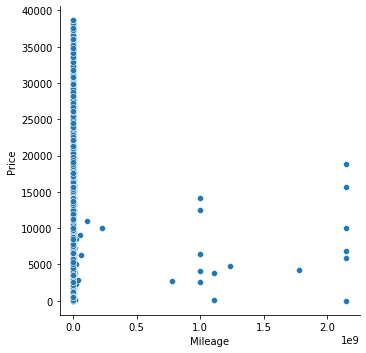

In [60]:
plt.figure(figsize = (15,8))
sns.relplot(x='Mileage',y='Price',data=df_cleaned)

In [61]:
print(df_cleaned['Mileage'].describe())
print('10th percentile = ' +str(df['Mileage'].quantile(0.10)))
print('25th percentile = ' +str(df['Mileage'].quantile(0.25)))
print('50th percentile = ' +str(df['Mileage'].quantile(0.50)))
print('75th percentile = ' +str(df['Mileage'].quantile(0.75)))
print('90th percentile = ' +str(df['Mileage'].quantile(0.90)))
print('Mean mileage = ' +str(df['Mileage'].mean()))
print('Mean mileage = ' +str(df['Mileage'].max()))

count    1.905300e+04
mean     1.430823e+06
std      4.608461e+07
min      0.000000e+00
25%      7.033600e+04
50%      1.263200e+05
75%      1.890000e+05
max      2.147484e+09
Name: Mileage, dtype: float64
10th percentile = 25635.0
25th percentile = 70336.0
50th percentile = 126320.0
75th percentile = 189000.0
90th percentile = 265210.0
Mean mileage = 1430822.6429433685
Mean mileage = 2147483647


In [62]:
df_cleaned["Mileage"] = np.where(df_cleaned["Mileage"] >265210, 265210,df_cleaned['Mileage'])
print(df_cleaned['Mileage'].skew())

0.16365902303750002


In [63]:
df_cleaned.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4


In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19053 non-null  int64  
 1   Price             19053 non-null  int64  
 2   Levy              19053 non-null  object 
 3   Manufacturer      19053 non-null  object 
 4   Model             19053 non-null  object 
 5   Prod. year        19053 non-null  int64  
 6   Category          19053 non-null  object 
 7   Leather interior  19053 non-null  object 
 8   Fuel type         19053 non-null  object 
 9   Engine volume     19053 non-null  object 
 10  Mileage           19053 non-null  int32  
 11  Cylinders         19053 non-null  float64
 12  Gear box type     19053 non-null  object 
 13  Drive wheels      19053 non-null  object 
 14  Doors             19053 non-null  object 
 15  Wheel             19053 non-null  object 
 16  Color             19053 non-null  object

In [65]:
df_cleaned['Mileage'].skew()

0.16365902303750002

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

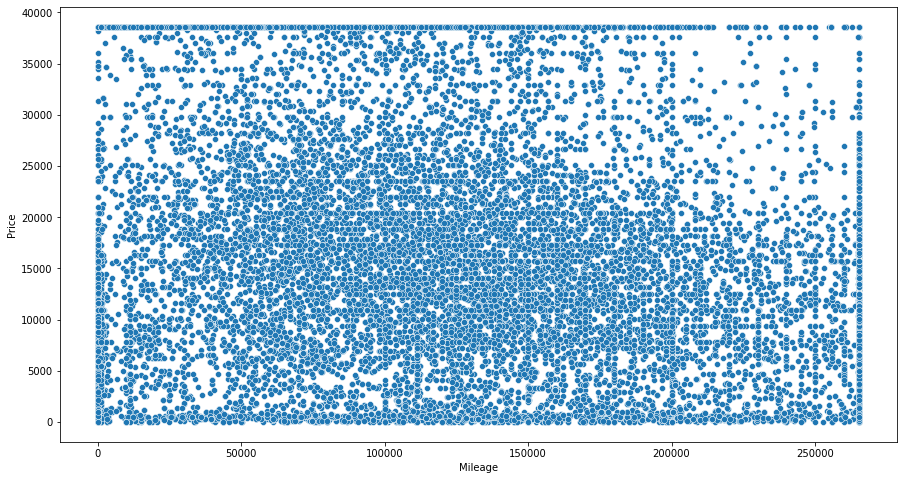

In [66]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='Mileage',y='Price',data=df_cleaned)

In [67]:
df_cleaned.Cylinders.value_counts()

4.0    14390
6.0     4494
5.0      169
Name: Cylinders, dtype: int64

In [68]:
df_cleaned.Color.value_counts()

Black            5004
White            4445
Silver           3772
Grey             2354
Blue             1380
Red               623
Green             308
Orange            251
Brown             183
Carnelian red     174
Golden            145
Beige             128
Sky blue          119
Yellow            102
Purple             39
Pink               26
Name: Color, dtype: int64

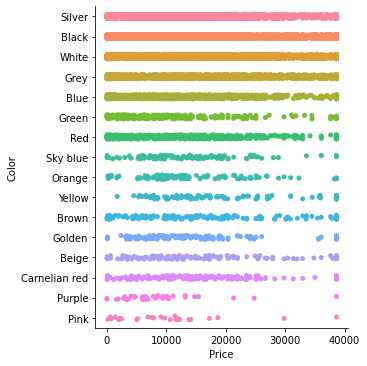

In [69]:
sns.catplot(x='Price',y='Color',data=df_cleaned)

<AxesSubplot:xlabel='Levy', ylabel='Price'>

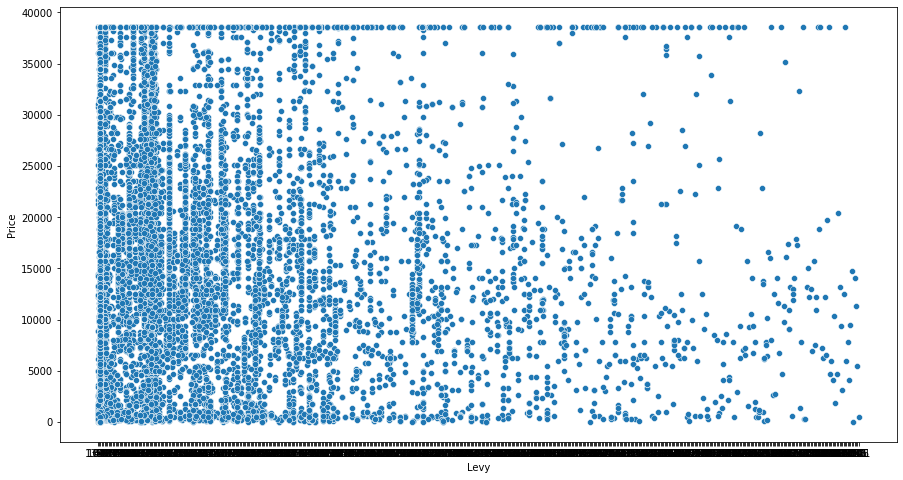

In [70]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='Levy',y='Price',data=df_cleaned)